## Brightes point in the image

In [13]:
import cv2
import numpy as np

# Bild laden
image = cv2.imread('RGB_Testpho_01.jpg')

# Bild in Graustufen umwandeln
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Schwellenwert festlegen (zum Beispiel Werte von 200 bis 255)
min_brightness = 200
max_brightness = 255

# Maske erstellen, um die hellsten Punkte zu isolieren
_, mask = cv2.threshold(gray, min_brightness, max_brightness, cv2.THRESH_BINARY)

# Die Koordinaten der hellsten Punkte finden
coordinates = np.column_stack(np.where(mask == 255))

# Bild anzeigen mit den markierten hellsten Punkten
for coord in coordinates:
    cv2.circle(image, (coord[1], coord[0]), 3, (0, 255, 0), -1)

cv2.imshow('Brightest Points', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [12]:
import cv2
import numpy as np

# Bild laden
image = cv2.imread('RGB_Testpho_01.jpg')

# Bild in Graustufen umwandeln
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Schwellenwert festlegen (zum Beispiel Werte von 200 bis 255)
min_brightness = 200
max_brightness = 255

# Maske erstellen, um die hellsten Punkte zu isolieren
_, mask = cv2.threshold(gray, min_brightness, max_brightness, cv2.THRESH_BINARY)

# Die Koordinaten der hellsten Punkte finden
coordinates = np.column_stack(np.where(mask == 255))

# Kreise um die hellsten Punkte zeichnen
# for coord in coordinates:
#    cv2.circle(image, (coord[1], coord[0]), 15, (0, 0, 255), 1)  # Zeichnet einen grünen Kreis mit einem Radius von 5

# Bild anzeigen mit den markierten hellsten Punkten
cv2.imshow('Brightest Points', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [14]:
# coordinates

In [16]:
import cv2
import numpy as np

# Bild laden
image = cv2.imread('RGB_Testpho_01.jpg')

# Bild in Graustufen umwandeln
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Schwellenwert festlegen (zum Beispiel Werte von 200 bis 255)
min_brightness = 200
max_brightness = 255

# Maske erstellen, um die hellsten Bereiche zu isolieren
_, mask = cv2.threshold(gray, min_brightness, max_brightness, cv2.THRESH_BINARY)

# Konturen der zusammenhängenden hellen Flächen finden
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Kreise um die zusammenhängenden Flächen zeichnen
for contour in contours:
    # Den umschließenden Kreis für jede Kontur berechnen
    (x, y), radius = cv2.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)

    # Den Kreis um die zusammenhängende Fläche zeichnen
    cv2.circle(image, center, radius, (0, 0, 255), 2)  # Grüner Kreis mit Dicke 2

# Bild anzeigen mit den markierten hellsten Bereichen
cv2.imshow('Brightest Areas', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [24]:
import cv2
import numpy as np

# Bild laden
image = cv2.imread('RGB_Testpho_01.jpg')

# Bild in Graustufen umwandeln
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Schwellenwert festlegen (zum Beispiel Werte von 200 bis 255)
min_brightness = 200
max_brightness = 255

# Maske erstellen, um die hellsten Bereiche zu isolieren
_, mask = cv2.threshold(gray, min_brightness, max_brightness, cv2.THRESH_BINARY)

# Konturen der zusammenhängenden hellen Flächen finden
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Fester Radius für die Kreise
fixed_radius = 30  # Radius in Pixeln

# Kreise um die zusammenhängenden Flächen zeichnen
for contour in contours:
    # Den Mittelpunkt der Fläche berechnen
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        continue  # Überspringe, wenn der Mittelpunkt nicht berechnet werden kann
    
    # Zeichne einen festen Kreis um den Mittelpunkt
    cv2.circle(image, (cX, cY), fixed_radius, (0, 255, 0), 2)  # Grüner Kreis mit Dicke 2

# Bild anzeigen mit den markierten hellsten Bereichen
cv2.imshow('Brightest Areas with Fixed Radius', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [27]:
import cv2
import numpy as np

# Bild laden
image = cv2.imread('RGB_Testpho_01.jpg')

# Bild in Graustufen umwandeln
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Schwellenwert festlegen (zum Beispiel Werte von 200 bis 255)
min_brightness = 200
max_brightness = 255

# Maske erstellen, um die hellsten Bereiche zu isolieren
_, mask = cv2.threshold(gray, min_brightness, max_brightness, cv2.THRESH_BINARY)

# Konturen der zusammenhängenden hellen Flächen finden
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Fester Radius für die Kreise
fixed_radius = 30  # Radius in Pixeln

# Kreise um die zusammenhängenden Flächen zeichnen
for contour in contours:
    # Den Mittelpunkt der Fläche berechnen
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        continue  # Überspringe, wenn der Mittelpunkt nicht berechnet werden kann
    
    # Zeichne einen festen Kreis um den Mittelpunkt
    cv2.circle(image, (cX, cY), fixed_radius, (0, 255, 0), 2)  # Grüner Kreis mit Dicke 2

# Gelbe Markierung für die hellsten Pixel im Bild hinzufügen
yellow_image = image.copy()
yellow_image[mask == 255] = [0, 0, 255]  # Setzt die hellsten Pixel auf Gelb (BGR: [0, 0, 0])

# Bild anzeigen mit den markierten hellsten Bereichen und den Kreisen
cv2.imshow('Brightest Areas with Fixed Radius and Highlighted Pixels', yellow_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Nearest Neighbors

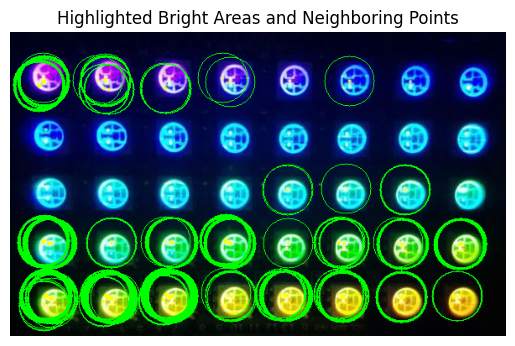

In [31]:
import cv2
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Bild laden und in Graustufen umwandeln
image = cv2.imread('RGB_Testpho_01.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Schwellenwert festlegen
min_brightness = 250
mask = gray >= min_brightness

# Koordinaten der hellsten Pixel extrahieren
coordinates = np.column_stack(np.where(mask))

# Nearest Neighbors-Algorithmus einrichten
radius = 30  # Radius in Pixeln
nbrs = NearestNeighbors(radius=radius).fit(coordinates)

# Nearest Neighbors für jeden Punkt finden
distances, indices = nbrs.radius_neighbors(coordinates)

# Bild mit markierten Flächen anzeigen
highlighted_image = image.copy()

# Schleife über jeden Punkt und zeichne um die gefundenen Punkte
for i, indices_i in enumerate(indices):
    if len(indices_i) > 0:  # Wenn es Nachbarn gibt
        for j in indices_i:
            # Gelbe Punkte zeichnen
            cv2.circle(highlighted_image, (coordinates[j][1], coordinates[j][0]), 1, (0, 255, 255), -1)
        # Optional: Kreis um den Ursprungspunkt zeichnen
        cv2.circle(highlighted_image, (coordinates[i][1], coordinates[i][0]), radius, (0, 255, 0), 1)

# Bild anzeigen
plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
plt.title('Highlighted Bright Areas and Neighboring Points')
plt.axis('off')
plt.show()


## Cluster & Nearest Neighbors & fixed radius


In [44]:
import cv2
import numpy as np
from sklearn.cluster import DBSCAN

# Bild laden und in Graustufen umwandeln
image = cv2.imread('RGB_Testpho_01.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Schwellenwert festlegen
min_brightness = 230
mask = gray >= min_brightness

# Koordinaten der hellsten Pixel extrahieren
coordinates = np.column_stack(np.where(mask))

# Wenn keine Punkte vorhanden sind, beenden
if len(coordinates) == 0:
    print("Keine hellen Punkte gefunden.")
    exit()

# DBSCAN-Clusteralgorithmus anwenden, um zusammenhängende Cluster zu finden
dbscan = DBSCAN(eps=20, min_samples=1).fit(coordinates)  # eps ist der maximale Abstand zwischen Punkten im selben Cluster
labels = dbscan.labels_

# Fester Radius für die Kreise
fixed_radius = 25  # Radius in Pixeln

# Bild mit den gezeichneten Kreisen erstellen
highlighted_image = image.copy()

# Schleife über jeden Cluster und zeichne einen Kreis
for label in np.unique(labels):
    # Finde die Punkte, die zu diesem Cluster gehören
    cluster_points = coordinates[labels == label]
    
    # Den Mittelpunkt des Clusters berechnen
    center = np.mean(cluster_points, axis=0)
    # print(center)
    
    # Kreis um den Mittelpunkt zeichnen
    cv2.circle(highlighted_image, (int(center[1]), int(center[0])), fixed_radius, (0, 255, 0), 2)  # Grüner Kreis mit Dicke 2

# Helle Punkte ebenfalls in Gelb markieren
highlighted_image[mask] = [0, 255, 255]  # Gelbe Markierung der hellsten Pixel

# Bild anzeigen
cv2.imshow('Cluster with Fixed Radius', highlighted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [41]:
len(center)

2

# Kreise zusammen mit der ermittelten Fläche in einen DataFrame

In [72]:
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN

# Bild laden und in Graustufen umwandeln
image = cv2.imread('RGB_Testpho_01.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Schwellenwert festlegen
min_brightness = 200
mask = gray >= min_brightness

# Koordinaten der hellsten Pixel extrahieren
coordinates = np.column_stack(np.where(mask))

# Wenn keine Punkte vorhanden sind, beenden
if len(coordinates) == 0:
    print("Keine hellen Punkte gefunden.")
    exit()

# DBSCAN-Clusteralgorithmus anwenden, um zusammenhängende Cluster zu finden
dbscan = DBSCAN(eps=30, min_samples=1).fit(coordinates)  # eps ist der maximale Abstand zwischen Punkten im selben Cluster
labels = dbscan.labels_

# Fester Radius für die Kreise
fixed_radius = 20  # Radius in Pixeln

# Bild mit den gezeichneten Kreisen erstellen
highlighted_image = image.copy()

# Listen für die DataFrame-Daten
centers = []
areas = []

# Schleife über jeden Cluster und zeichne einen Kreis
for label in np.unique(labels):
    # Finde die Punkte, die zu diesem Cluster gehören
    cluster_points = coordinates[labels == label]
    
    # Den Mittelpunkt des Clusters berechnen
    center = np.mean(cluster_points, axis=0)
    
    # Fläche berechnen (Anzahl der Punkte im Cluster)
    area = len(cluster_points)
    
    # Daten für DataFrame speichern
    centers.append(center)
    areas.append(area)
    
    # Kreis um den Mittelpunkt zeichnen
    cv2.circle(highlighted_image, (int(center[1]), int(center[0])), fixed_radius, (0, 255, 0), 2)  # Grüner Kreis mit Dicke 2

# Helle Punkte ebenfalls in Gelb markieren
highlighted_image[mask] = [0, 255, 255]  # Gelbe Markierung der hellsten Pixel

# DataFrame erstellen
df = pd.DataFrame(centers, columns=['Center X', 'Center Y'])
df['Area'] = areas

# DataFrame als CSV speichern mit Semikolon als Trennzeichen und Komma als Dezimaltrennzeichen
csv_file_path = 'clusters.csv'
df.to_csv(csv_file_path, index=False, sep=',', decimal='.')  # Dezimaltrennzeichen auf Komma setzen


# DataFrame anzeigen
# print(df)

# Bild anzeigen
cv2.imshow('Cluster with Fixed Radius', highlighted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


clusters.csv

In [73]:
import pandas as pd

# Lade die CSV-Datei
df = pd.read_csv('clusters.csv')

# Nehmen wir an, die Spalten heißen 'Center X', 'Center Y' und 'Area'
x = df['Center X']
y = df['Center Y']
area = df['Area']


In [74]:
import plotly.express as px

# Erstelle das Blasendiagramm
fig = px.scatter(
    df,
    x='Center X',
    y='Center Y',
    size='Area',  # Größe der Blasen basierend auf der Area
    color='Area',  # Farbskala basierend auf der Area
    color_continuous_scale='Viridis',  # Farbskala, z.B. Viridis, Cividis, etc.
    labels={'Center X': 'X-Koordinate', 'Center Y': 'Y-Koordinate', 'Area': 'Area'},
    size_max=60  # Maximale Größe der Blasen
)

# Füge Titel hinzu und zeige das Diagramm an
fig.update_layout(
    title='Blasendiagramm mit Farbskala',
    xaxis_title='X-Koordinate',
    yaxis_title='Y-Koordinate'
)

fig.show()

density_heatmap

In [92]:
import pandas as pd

# Lade die CSV-Datei
df = pd.read_csv('clusters.csv')

# Nehmen wir an, die Spalten heißen 'Center X', 'Center Y' und 'Area'


In [90]:
# heatmap_data

In [93]:
import pandas as pd
import numpy as np
import plotly.express as px

# Angenommen, df ist dein vorhandener DataFrame
# Beispielhafte Struktur des DataFrames:
# df = pd.DataFrame({
#     'Center X': [...],
#     'Center Y': [...],
#     'Cluster ID': [...]
# })

# Definiere die Bin-Grenzen
x_bins = np.arange(0, df['Center X'].max() + 50, 50)  # Binning für Center X
y_bins = np.arange(0, df['Center Y'].max() + 50, 50)  # Binning für Center Y

# Teile die Daten in Bins ein
df['x_bin'] = pd.cut(df['Center X'], bins=x_bins, labels=x_bins[:-1], include_lowest=True)
df['y_bin'] = pd.cut(df['Center Y'], bins=y_bins, labels=y_bins[:-1], include_lowest=True)

# Erstelle eine Pivot-Tabelle
heatmap_data = df.pivot_table(index='y_bin', columns='x_bin', values='Cluster ID', aggfunc='max')

# Erstelle die Heatmap
fig = px.imshow(
    heatmap_data,
    color_continuous_scale='Viridis',  # Farbskala
    labels={'color': 'Cluster ID'},
    x=heatmap_data.columns,  # Spaltennamen für die x-Achse
    y=heatmap_data.index,    # Zeilennamen für die y-Achse
    text_auto=True           # Automatische Anzeige der Cluster-ID in den Zellen
)

# Layout anpassen und Diagramm anzeigen
fig.update_layout(
    title='Cluster Heatmap mit Bins',
    xaxis_title='Center X',
    yaxis_title='Center Y'
)

fig.show()




KeyError: 'Cluster ID'